# Akƒ±m ve G√º√ß Kolonlarƒ± ile Arƒ±za Tespit Model

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
# Veriyi y√ºkleyelim
df = pd.read_csv("yeni_veri/firin_verileri_temizlenmis.csv")

In [68]:
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')

## Durum Sƒ±nƒ±flandƒ±rmasƒ±

In [69]:
# gu√ß ve amper kolonlarƒ±
kolon_ciftleri = [
    ('on_isitma_guc_%', 'on_isitma_amp.'),
    ('ceh.1_ust1_guc_%', 'ceh.1_ust1_amp.'),
    ('ceh.1_ust2_guc_%', 'ceh.1_ust2_amp.'),
    ('ceh.1_alt1_guc_%', 'ceh.1_alt1_amp.'),
    ('ceh.2_ust1_guc_%', 'ceh.2_ust1_amp.'),
    ('ceh.2_ust2_guc_%', 'ceh.2_ust2_amp.'),
    ('ceh.2_alt1_guc_%', 'ceh.2_alt1_amp.'),
    ('ceh.2_alt2_guc_%', 'ceh.2_alt2_amp.'),
    ('ceh.3_ust1_guc_%', 'ceh.3_ust1_amp.'),
    ('ceh.3_ust2_guc_%', 'ceh.3_ust2_amp.'),
    ('ceh.3_alt1_guc_%', 'ceh.3_alt1_amp.'),
    ('ceh.3_alt2_guc_%', 'ceh.3_alt2_amp.')
]

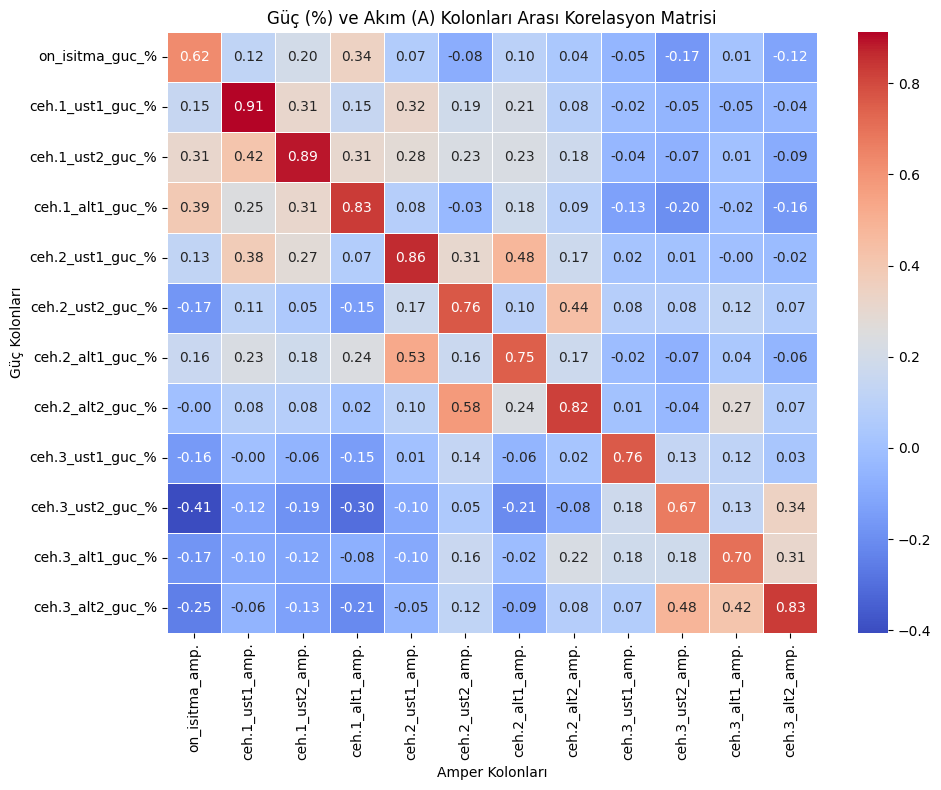

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Kolon isimlerini ayƒ±r
guc_kolonlari = [guc for guc, _ in kolon_ciftleri]
amp_kolonlari = [amp for _, amp in kolon_ciftleri]

# Sadece bu kolonlardan olu≈üan veri
df_subset = df[guc_kolonlari + amp_kolonlari]

# Korelasyon matrisini al
corr_matrix = df_subset.corr().loc[guc_kolonlari, amp_kolonlari]  # sadece g√º√ß vs amper ili≈ükileri

# G√∂rselle≈ütir
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("G√º√ß (%) ve Akƒ±m (A) Kolonlarƒ± Arasƒ± Korelasyon Matrisi")
plt.xlabel("Amper Kolonlarƒ±")
plt.ylabel("G√º√ß Kolonlarƒ±")
plt.tight_layout()
plt.show()


Korelasyonu 0.80'den y√ºksek √ßiftler se√ßilere modelde kullanƒ±lacak. 

In [71]:
kolon_ciftleri = [
    ('ceh.1_ust1_guc_%', 'ceh.1_ust1_amp.'),
    ('ceh.1_ust2_guc_%', 'ceh.1_ust2_amp.'),
    ('ceh.1_alt1_guc_%', 'ceh.1_alt1_amp.'),
    ('ceh.2_ust1_guc_%', 'ceh.2_ust1_amp.'),
    ('ceh.2_ust2_guc_%', 'ceh.2_ust2_amp.'),
    ('ceh.2_alt1_guc_%', 'ceh.2_alt1_amp.'),
    ('ceh.2_alt2_guc_%', 'ceh.2_alt2_amp.'),
    ('ceh.3_alt2_guc_%', 'ceh.3_alt2_amp.')]

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import time

# === Durum sƒ±nƒ±flandƒ±rƒ±cƒ± fonksiyon ===
def durum_siniflandir(guc, akim):
    if guc >= 9 and akim >= 100:
        return "‚úÖ Isƒ±tma aktif"
    elif akim == 0 and guc == 0:
        return "üîç Arƒ±zalƒ±/Durmu≈ü Kontrol Edilmeli"
    elif akim >= 100 and guc == 0:
        return "‚ö†Ô∏è G√º√ß sens√∂r hatasƒ±"
    elif akim == 0 and guc >= 9:
        return "‚ö†Ô∏è Akƒ±m sens√∂r hatasƒ±"
    else:
        return "ü§î Diƒüer"


In [73]:
for guc_kolon, amp_kolon in kolon_ciftleri:
    durum_kolon = guc_kolon.replace('guc_%', 'durum')

        # Durum sƒ±nƒ±flandƒ±rmasƒ±
    df[durum_kolon] = df.apply(
        lambda row: durum_siniflandir(row[guc_kolon], row[amp_kolon]),
        axis=1
    )

    # Durum sayƒ±sƒ± √∂zeti
    durum_sayilari = df[durum_kolon].value_counts()
    print(f"üìä {durum_kolon} Durum √ñzeti:")
    print(durum_sayilari)
    print("--------------------------------------------------")

        

üìä ceh.1_ust1_durum Durum √ñzeti:
ceh.1_ust1_durum
‚úÖ Isƒ±tma aktif                       17961
üîç Arƒ±zalƒ±/Durmu≈ü Kontrol Edilmeli     3664
‚ö†Ô∏è Akƒ±m sens√∂r hatasƒ±                  414
‚ö†Ô∏è G√º√ß sens√∂r hatasƒ±                    73
ü§î Diƒüer                                 28
Name: count, dtype: int64
--------------------------------------------------
üìä ceh.1_ust2_durum Durum √ñzeti:
ceh.1_ust2_durum
‚úÖ Isƒ±tma aktif                       20473
üîç Arƒ±zalƒ±/Durmu≈ü Kontrol Edilmeli     1111
‚ö†Ô∏è Akƒ±m sens√∂r hatasƒ±                  431
ü§î Diƒüer                                 83
‚ö†Ô∏è G√º√ß sens√∂r hatasƒ±                    42
Name: count, dtype: int64
--------------------------------------------------
üìä ceh.1_alt1_durum Durum √ñzeti:
ceh.1_alt1_durum
‚úÖ Isƒ±tma aktif                       17671
üîç Arƒ±zalƒ±/Durmu≈ü Kontrol Edilmeli     2500
‚ö†Ô∏è Akƒ±m sens√∂r hatasƒ±                 1222
‚ö†Ô∏è G√º√ß sens√∂r hatasƒ±                   697
ü§î 

In [74]:
df.columns

Index(['datetime', 'prg', 'giris_isi', 'on_isitma_set_isi', 'on_isitma_isi',
       'on_isitma_guc_%', 'on_isitma_amp.', 'ceh.1_ust1_set_isi',
       'ceh.1_ust1_isi', 'ceh.1_ust1_guc_%', 'ceh.1_ust1_amp.',
       'ceh.1_ust2_set_isi', 'ceh.1_ust2__isi', 'ceh.1_ust2_guc_%',
       'ceh.1_ust2_amp.', 'ceh.1_alt1_set_isi', 'ceh.1_alt1_isi',
       'ceh.1_alt1_guc_%', 'ceh.1_alt1_amp.', 'ceh.2_ust1_set_isi',
       'ceh.2_ust1_isi', 'ceh.2_ust1_guc_%', 'ceh.2_ust1_amp.',
       'ceh.2_ust2_set_isi', 'ceh.2_ust2_isi', 'ceh.2_ust2_guc_%',
       'ceh.2_ust2_amp.', 'ceh.2_alt1_set_isi', 'ceh.2_alt1_isi',
       'ceh.2_alt1_guc_%', 'ceh.2_alt1_amp.', 'ceh.2_alt2_set_isi',
       'ceh.2_alt2_isi', 'ceh.2_alt2_guc_%', 'ceh.2_alt2_amp.',
       'ceh.3_ust1_set_isi', 'ceh.3_ust1_isi', 'ceh.3_ust1_guc_%',
       'ceh.3_ust1_amp.', 'ceh.3_ust2_set_isi', 'ceh.3_ust2_isi',
       'ceh.3_ust2_guc_%', 'ceh.3_ust2_amp.', 'ceh.3_alt1_set_isi',
       'ceh.3_alt1_isi', 'ceh.3_alt1_guc_%', 'ceh.3_alt1_amp.

## Genel Uyarƒ± S√ºtunu (genel_uyari)

In [75]:
# Bu kod her satƒ±r i√ßin t√ºm bile≈üenlerin durumlarƒ±nƒ± tarƒ±yor ve eƒüer herhangi birinde bir uyarƒ± durumu varsa o satƒ±ra 'üö® Uyarƒ±', yoksa '‚úÖ Normal' etiketi veriyor.
# Hedef s√ºtunlar (Korelasyonu y√ºksek olanlar)
durum_kolonlari = [
     'ceh.1_ust1_durum', 'ceh.1_ust2_durum',
    'ceh.1_alt1_durum', 'ceh.2_ust1_durum', 'ceh.2_ust2_durum',
    'ceh.2_alt1_durum', 'ceh.2_alt2_durum', 'ceh.3_alt2_durum'
]

# Uyarƒ± durumu: Aktif dƒ±≈üƒ±nda kalan her ≈üey
uyari_durumlari = [
    'üîç Arƒ±zalƒ±/Durmu≈ü Kontrol Edilmeli',
    '‚ö†Ô∏è Akƒ±m sens√∂r hatasƒ±',
    '‚ö†Ô∏è G√º√ß sens√∂r hatasƒ±',
    'ü§î Diƒüer'
]

# Satƒ±rda herhangi bir uyarƒ± varsa "üö® Uyarƒ±", yoksa "‚úÖ Normal"
df['genel_uyari'] = df[durum_kolonlari].apply(
    lambda row: 'üö® Uyarƒ±' if any(durum in uyari_durumlari for durum in row) else '‚úÖ Normal',
    axis=1
)


In [76]:
# Toplam uyarƒ± sayƒ±sƒ±
toplam_uyari = (df['genel_uyari'] == 'üö® Uyarƒ±').sum()
print(f"Toplam uyarƒ± sayƒ±sƒ±: {toplam_uyari}")

print(df['genel_uyari'].value_counts())

Toplam uyarƒ± sayƒ±sƒ±: 10398
genel_uyari
‚úÖ Normal    11742
üö® Uyarƒ±     10398
Name: count, dtype: int64


In [77]:
df.head()

datetime  prg  giris_isi  on_isitma_set_isi  on_isitma_isi  \
0 2024-11-01 08:00:00  1.0      337.0              550.0          549.0   
1 2024-11-01 08:01:00  1.0      343.0              550.0          547.0   
2 2024-11-01 08:02:00  1.0      336.0              550.0          551.0   
3 2024-11-01 08:03:00  1.0      329.0              550.0          547.0   
4 2024-11-01 08:04:00  1.0      345.0              550.0          552.0   

   on_isitma_guc_%  on_isitma_amp.  ceh.1_ust1_set_isi  ceh.1_ust1_isi  \
0             75.0           647.0               680.0           705.0   
1             75.0           641.0               680.0           701.0   
2             74.0           638.0               680.0           704.0   
3             75.0           645.0               680.0           709.0   
4             69.0           495.0               680.0           704.0   

   ceh.1_ust1_guc_%  ...  cikis_per.fan_hz                   ceh.1_ust1_durum  \
0               0.0  ...               0.0  üîç Arƒ±zalƒ±/Durmu≈ü Kontrol Edilmeli   
1               0.0  ...               0.0  üîç Arƒ±zalƒ±/Durmu≈ü Kontrol Edilmeli   
2               0.0  ...               0.0  üîç Arƒ±zalƒ±/Durmu≈ü Kontrol Edilmeli   
3               0.0  ...               0.0  üîç Arƒ±zalƒ±/Durmu≈ü Kontrol Edilmeli   
4               0.0  ...               0.0  üîç Arƒ±zalƒ±/Durmu≈ü Kontrol Edilmeli   

   ceh.1_ust2_durum                   ceh.1_alt1_durum  ceh.2_ust1_durum  \
0    ‚úÖ Isƒ±tma aktif  üîç Arƒ±zalƒ±/Durmu≈ü Kontrol Edilmeli    ‚úÖ Isƒ±tma aktif   
1    ‚úÖ Isƒ±tma aktif                     ‚úÖ Isƒ±tma aktif    ‚úÖ Isƒ±tma aktif   
2    ‚úÖ Isƒ±tma aktif                     ‚úÖ Isƒ±tma aktif    ‚úÖ Isƒ±tma aktif   
3    ‚úÖ Isƒ±tma aktif                     ‚úÖ Isƒ±tma aktif    ‚úÖ Isƒ±tma aktif   
4    ‚úÖ Isƒ±tma aktif                     ‚úÖ Isƒ±tma aktif    ‚úÖ Isƒ±tma aktif   

   ceh.2_ust2_durum  ceh.2_alt1_durum  ceh.2_alt2_durum  ceh.3_alt2_durum  \
0    ‚úÖ Isƒ±tma aktif    ‚úÖ Isƒ±tma aktif    ‚úÖ Isƒ±tma aktif    ‚úÖ Isƒ±tma aktif   
1    ‚úÖ Isƒ±tma aktif    ‚úÖ Isƒ±tma aktif    ‚úÖ Isƒ±tma aktif    ‚úÖ Isƒ±tma aktif   
2    ‚úÖ Isƒ±tma aktif    ‚úÖ Isƒ±tma aktif    ‚úÖ Isƒ±tma aktif    ‚úÖ Isƒ±tma aktif   
3    ‚úÖ Isƒ±tma aktif    ‚úÖ Isƒ±tma aktif    ‚úÖ Isƒ±tma aktif    ‚úÖ Isƒ±tma aktif   
4    ‚úÖ Isƒ±tma aktif    ‚úÖ Isƒ±tma aktif    ‚úÖ Isƒ±tma aktif    ‚úÖ Isƒ±tma aktif   

   genel_uyari  
0      üö® Uyarƒ±  
1      üö® Uyarƒ±  
2      üö® Uyarƒ±  
3      üö® Uyarƒ±  
4      üö® Uyarƒ±  

[5 rows x 66 columns]

In [78]:
df.columns

Index(['datetime', 'prg', 'giris_isi', 'on_isitma_set_isi', 'on_isitma_isi',
       'on_isitma_guc_%', 'on_isitma_amp.', 'ceh.1_ust1_set_isi',
       'ceh.1_ust1_isi', 'ceh.1_ust1_guc_%', 'ceh.1_ust1_amp.',
       'ceh.1_ust2_set_isi', 'ceh.1_ust2__isi', 'ceh.1_ust2_guc_%',
       'ceh.1_ust2_amp.', 'ceh.1_alt1_set_isi', 'ceh.1_alt1_isi',
       'ceh.1_alt1_guc_%', 'ceh.1_alt1_amp.', 'ceh.2_ust1_set_isi',
       'ceh.2_ust1_isi', 'ceh.2_ust1_guc_%', 'ceh.2_ust1_amp.',
       'ceh.2_ust2_set_isi', 'ceh.2_ust2_isi', 'ceh.2_ust2_guc_%',
       'ceh.2_ust2_amp.', 'ceh.2_alt1_set_isi', 'ceh.2_alt1_isi',
       'ceh.2_alt1_guc_%', 'ceh.2_alt1_amp.', 'ceh.2_alt2_set_isi',
       'ceh.2_alt2_isi', 'ceh.2_alt2_guc_%', 'ceh.2_alt2_amp.',
       'ceh.3_ust1_set_isi', 'ceh.3_ust1_isi', 'ceh.3_ust1_guc_%',
       'ceh.3_ust1_amp.', 'ceh.3_ust2_set_isi', 'ceh.3_ust2_isi',
       'ceh.3_ust2_guc_%', 'ceh.3_ust2_amp.', 'ceh.3_alt1_set_isi',
       'ceh.3_alt1_isi', 'ceh.3_alt1_guc_%', 'ceh.3_alt1_amp.

## Hedef Deƒüi≈ükenin Hazƒ±rlanmasƒ±

In [79]:
df['genel_uyari_flag'] = df['genel_uyari'].map({
    '‚úÖ Normal': 0,
    'üö® Uyarƒ±': 1
})

In [80]:
## Test a≈üamasƒ±nda veri almak i√ßin
df.to_csv("yeni_veri/test_ariza_tespit_model_veriler_guc_amper.csv", index=False)

## T√ºm Sens√∂rler ile Model Eƒüitimi

In [81]:
sensor_cols = [
    'giris_isi', 'on_isitma_set_isi', 'on_isitma_isi', 'on_isitma_guc_%', 'on_isitma_amp.',
    'ceh.1_ust1_set_isi', 'ceh.1_ust1_isi', 'ceh.1_ust1_guc_%', 'ceh.1_ust1_amp.',
    'ceh.1_ust2_set_isi', 'ceh.1_ust2__isi', 'ceh.1_ust2_guc_%', 'ceh.1_ust2_amp.',
    'ceh.1_alt1_set_isi', 'ceh.1_alt1_isi', 'ceh.1_alt1_guc_%', 'ceh.1_alt1_amp.',
    'ceh.2_ust1_set_isi', 'ceh.2_ust1_isi', 'ceh.2_ust1_guc_%', 'ceh.2_ust1_amp.',
    'ceh.2_ust2_set_isi', 'ceh.2_ust2_isi', 'ceh.2_ust2_guc_%', 'ceh.2_ust2_amp.',
    'ceh.2_alt1_set_isi', 'ceh.2_alt1_isi', 'ceh.2_alt1_guc_%', 'ceh.2_alt1_amp.',
    'ceh.2_alt2_set_isi', 'ceh.2_alt2_isi', 'ceh.2_alt2_guc_%', 'ceh.2_alt2_amp.',
    'ceh.3_ust1_set_isi', 'ceh.3_ust1_isi', 'ceh.3_ust1_guc_%', 'ceh.3_ust1_amp.',
    'ceh.3_ust2_set_isi', 'ceh.3_ust2_isi', 'ceh.3_ust2_guc_%', 'ceh.3_ust2_amp.',
    'ceh.3_alt1_set_isi', 'ceh.3_alt1_isi', 'ceh.3_alt1_guc_%', 'ceh.3_alt1_amp.',
    'ceh.3_alt2_set_isi', 'ceh.3_alt2_isi', 'ceh.3_alt2_guc_%', 'ceh.3_alt2_amp.',
    'sogutma1_isi', 'sogutma2_isi', 'sogutma3_isi',
    'rulo_frekans_hz', 'giris_per.fan_hz', 'cikis_per.fan_hz'
]


In [82]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Sadece sens√∂r kolonlarƒ±nƒ± ve hedefi al
X = df[sensor_cols].copy()
y = df['genel_uyari'].copy()

# Hedef deƒüi≈ükeni sayƒ±sala √ßevir (0=Normal, 1=Uyarƒ±)
le = LabelEncoder()
y = le.fit_transform(y)

# Eksik veri varsa temizle
X = X.dropna()

# X ve y senkronize olsun
y = y[X.index]

# Eƒüitim/test ayrƒ±mƒ±
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)



In [83]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report

model = LGBMClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=le.classes_))

[LightGBM] [Info] Number of positive: 7279, number of negative: 8219
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004549 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6319
[LightGBM] [Info] Number of data points in the train set: 15498, number of used features: 53
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.469674 -> initscore=-0.121455
[LightGBM] [Info] Start training from score -0.121455
              precision    recall  f1-score   support

    ‚úÖ Normal       1.00      1.00      1.00      3523
     üö® Uyarƒ±       1.00      1.00      1.00      3119

    accuracy                           1.00      6642
   macro avg       1.00      1.00      1.00      6642
weighted avg       1.00      1.00      1.00      6642



C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


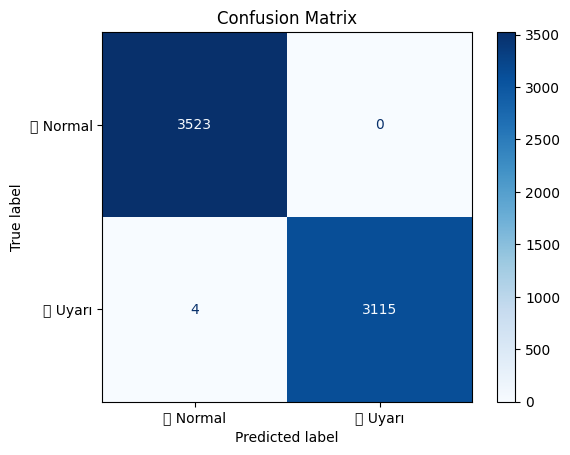

In [84]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion matrix olu≈ütur
cm = confusion_matrix(y_test, y_pred)

# G√∂rselle≈ütir
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['‚úÖ Normal', 'üö® Uyarƒ±'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()


In [85]:
df.head()

datetime  prg  giris_isi  on_isitma_set_isi  on_isitma_isi  \
0 2024-11-01 08:00:00  1.0      337.0              550.0          549.0   
1 2024-11-01 08:01:00  1.0      343.0              550.0          547.0   
2 2024-11-01 08:02:00  1.0      336.0              550.0          551.0   
3 2024-11-01 08:03:00  1.0      329.0              550.0          547.0   
4 2024-11-01 08:04:00  1.0      345.0              550.0          552.0   

   on_isitma_guc_%  on_isitma_amp.  ceh.1_ust1_set_isi  ceh.1_ust1_isi  \
0             75.0           647.0               680.0           705.0   
1             75.0           641.0               680.0           701.0   
2             74.0           638.0               680.0           704.0   
3             75.0           645.0               680.0           709.0   
4             69.0           495.0               680.0           704.0   

   ceh.1_ust1_guc_%  ...                   ceh.1_ust1_durum  ceh.1_ust2_durum  \
0               0.0  ...  üîç Arƒ±zalƒ±/Durmu≈ü Kontrol Edilmeli    ‚úÖ Isƒ±tma aktif   
1               0.0  ...  üîç Arƒ±zalƒ±/Durmu≈ü Kontrol Edilmeli    ‚úÖ Isƒ±tma aktif   
2               0.0  ...  üîç Arƒ±zalƒ±/Durmu≈ü Kontrol Edilmeli    ‚úÖ Isƒ±tma aktif   
3               0.0  ...  üîç Arƒ±zalƒ±/Durmu≈ü Kontrol Edilmeli    ‚úÖ Isƒ±tma aktif   
4               0.0  ...  üîç Arƒ±zalƒ±/Durmu≈ü Kontrol Edilmeli    ‚úÖ Isƒ±tma aktif   

                    ceh.1_alt1_durum  ceh.2_ust1_durum  ceh.2_ust2_durum  \
0  üîç Arƒ±zalƒ±/Durmu≈ü Kontrol Edilmeli    ‚úÖ Isƒ±tma aktif    ‚úÖ Isƒ±tma aktif   
1                     ‚úÖ Isƒ±tma aktif    ‚úÖ Isƒ±tma aktif    ‚úÖ Isƒ±tma aktif   
2                     ‚úÖ Isƒ±tma aktif    ‚úÖ Isƒ±tma aktif    ‚úÖ Isƒ±tma aktif   
3                     ‚úÖ Isƒ±tma aktif    ‚úÖ Isƒ±tma aktif    ‚úÖ Isƒ±tma aktif   
4                     ‚úÖ Isƒ±tma aktif    ‚úÖ Isƒ±tma aktif    ‚úÖ Isƒ±tma aktif   

   ceh.2_alt1_durum  ceh.2_alt2_durum  ceh.3_alt2_durum  genel_uyari  \
0    ‚úÖ Isƒ±tma aktif    ‚úÖ Isƒ±tma aktif    ‚úÖ Isƒ±tma aktif      üö® Uyarƒ±   
1    ‚úÖ Isƒ±tma aktif    ‚úÖ Isƒ±tma aktif    ‚úÖ Isƒ±tma aktif      üö® Uyarƒ±   
2    ‚úÖ Isƒ±tma aktif    ‚úÖ Isƒ±tma aktif    ‚úÖ Isƒ±tma aktif      üö® Uyarƒ±   
3    ‚úÖ Isƒ±tma aktif    ‚úÖ Isƒ±tma aktif    ‚úÖ Isƒ±tma aktif      üö® Uyarƒ±   
4    ‚úÖ Isƒ±tma aktif    ‚úÖ Isƒ±tma aktif    ‚úÖ Isƒ±tma aktif      üö® Uyarƒ±   

   genel_uyari_flag  
0                 1  
1                 1  
2                 1  
3                 1  
4                 1  

[5 rows x 67 columns]

In [86]:
# √ñrnek bir satƒ±r al
test_sample = X.iloc[[1410]]

# Modelle tahmin et
prediction = model.predict(test_sample)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


# Tahmini etikete √ßevir ve g√∂ster
predicted_label = label_encoder.inverse_transform(prediction)[0]
print("Modelin tahmini:", predicted_label)

# ‚úÖ Normal : 0
# üö® Uyarƒ±  : 1

Modelin tahmini: 0


In [87]:
import pandas as pd

test_sample = pd.DataFrame([{
    'giris_isi': 340.0,
    'on_isitma_set_isi': 550.0,
    'on_isitma_isi': 548.0,
    'on_isitma_guc_%': 75.0,
    'on_isitma_amp.': 640.0,
    'ceh.1_ust1_set_isi': 680.0,
    'ceh.1_ust1_isi': 705.0,
    'ceh.1_ust1_guc_%': 0.0,
    'ceh.1_ust1_amp.': 0.0,
    'ceh.1_ust2_set_isi': 680.0,
    'ceh.1_ust2_isi': 700.0,
    'ceh.1_ust2_guc_%': 0.0,
    'ceh.1_ust2_amp.': 0.0,
    'ceh.1_alt1_set_isi': 680.0,
    'ceh.1_alt1_isi': 698.0,
    'ceh.1_alt1_guc_%': 0.0,
    'ceh.1_alt1_amp.': 0.0,
    'ceh.2_ust1_set_isi': 680.0,
    'ceh.2_ust1_isi': 703.0,
    'ceh.2_ust1_guc_%': 0.0,
    'ceh.2_ust1_amp.': 0.0,
    'ceh.2_ust2_set_isi': 680.0,
    'ceh.2_ust2_isi': 706.0,
    'ceh.2_ust2_guc_%': 0.0,
    'ceh.2_ust2_amp.': 0.0,
    'ceh.2_alt1_set_isi': 680.0,
    'ceh.2_alt1_isi': 701.0,
    'ceh.2_alt1_guc_%': 0.0,
    'ceh.2_alt1_amp.': 0.0,
    'ceh.2_alt2_set_isi': 680.0,
    'ceh.2_alt2_isi': 700.0,
    'ceh.2_alt2_guc_%': 0.0,
    'ceh.2_alt2_amp.': 0.0,
    'ceh.3_ust1_set_isi': 680.0,
    'ceh.3_ust1_isi': 704.0,
    'ceh.3_ust1_guc_%': 0.0,
    'ceh.3_ust1_amp.': 0.0,
    'ceh.3_ust2_set_isi': 680.0,
    'ceh.3_ust2_isi': 702.0,
    'ceh.3_ust2_guc_%': 0.0,
    'ceh.3_ust2_amp.': 0.0,
    'ceh.3_alt1_set_isi': 680.0,
    'ceh.3_alt1_isi': 700.0,
    'ceh.3_alt1_guc_%': 0.0,
    'ceh.3_alt1_amp.': 0.0,
    'ceh.3_alt2_set_isi': 680.0,
    'ceh.3_alt2_isi': 699.0,
    'ceh.3_alt2_guc_%': 0.0,
    'ceh.3_alt2_amp.': 0.0,
    'sogutma1_isi': 50.0,
    'sogutma2_isi': 50.0,
    'sogutma3_isi': 50.0,
    'rulo_frekans_hz': 25.0,
    'giris_per.fan_hz': 30.0,
    'cikis_per.fan_hz': 30.0
}], columns=X.columns)



test_sample1 = pd.DataFrame([{
    'giris_isi': 340.0,
    'on_isitma_set_isi': 550.0,
    'on_isitma_isi': 548.0,
    'on_isitma_guc_%': 75.0,
    'on_isitma_amp.': 640.0,
    'ceh.1_ust1_set_isi': 680.0,
    'ceh.1_ust1_isi': 705.0,
    'ceh.1_ust1_guc_%': 10.0,
    'ceh.1_ust1_amp.': 300.0,
    'ceh.1_ust2_set_isi': 680.0,
    'ceh.1_ust2_isi': 700.0,
    'ceh.1_ust2_guc_%': 10.0,
    'ceh.1_ust2_amp.': 400.0,
    'ceh.1_alt1_set_isi': 680.0,
    'ceh.1_alt1_isi': 698.0,
    'ceh.1_alt1_guc_%': 70.0,
    'ceh.1_alt1_amp.': 400.0,
    'ceh.2_ust1_set_isi': 680.0,
    'ceh.2_ust1_isi': 703.0,
    'ceh.2_ust1_guc_%': 10.0,
    'ceh.2_ust1_amp.': 400.0,
    'ceh.2_ust2_set_isi': 680.0,
    'ceh.2_ust2_isi': 706.0,
    'ceh.2_ust2_guc_%': 10.0,
    'ceh.2_ust2_amp.': 400.0,
    'ceh.2_alt1_set_isi': 680.0,
    'ceh.2_alt1_isi': 701.0,
    'ceh.2_alt1_guc_%': 10.0,
    'ceh.2_alt1_amp.': 400.0,
    'ceh.2_alt2_set_isi': 680.0,
    'ceh.2_alt2_isi': 700.0,
    'ceh.2_alt2_guc_%': 10.0,
    'ceh.2_alt2_amp.': 400.0,
    'ceh.3_ust1_set_isi': 680.0,
    'ceh.3_ust1_isi': 704.0,
    'ceh.3_ust1_guc_%': 10.0,
    'ceh.3_ust1_amp.': 400.0,
    'ceh.3_ust2_set_isi': 680.0,
    'ceh.3_ust2_isi': 702.0,
    'ceh.3_ust2_guc_%': 10.0,
    'ceh.3_ust2_amp.': 400.0,
    'ceh.3_alt1_set_isi': 680.0,
    'ceh.3_alt1_isi': 700.0,
    'ceh.3_alt1_guc_%': 10.0,
    'ceh.3_alt1_amp.': 400.0,
    'ceh.3_alt2_set_isi': 680.0,
    'ceh.3_alt2_isi': 699.0,
    'ceh.3_alt2_guc_%': 10.0,
    'ceh.3_alt2_amp.': 400.0,
    'sogutma1_isi': 50.0,
    'sogutma2_isi': 50.0,
    'sogutma3_isi': 50.0,
    'rulo_frekans_hz': 25.0,
    'giris_per.fan_hz': 30.0,
    'cikis_per.fan_hz': 30.0
}], columns=X.columns)


In [88]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

prediction = model.predict(test_sample)
print("Tahmin Sample:", label_encoder.inverse_transform(prediction)[0])

prediction = model.predict(test_sample1)
print("Tahmin Sample1:", label_encoder.inverse_transform(prediction)[0])



Tahmin Sample: 1
Tahmin Sample1: 0


## √ñznitelik (Feature) Se√ßimi

In [89]:
df.columns

Index(['datetime', 'prg', 'giris_isi', 'on_isitma_set_isi', 'on_isitma_isi',
       'on_isitma_guc_%', 'on_isitma_amp.', 'ceh.1_ust1_set_isi',
       'ceh.1_ust1_isi', 'ceh.1_ust1_guc_%', 'ceh.1_ust1_amp.',
       'ceh.1_ust2_set_isi', 'ceh.1_ust2__isi', 'ceh.1_ust2_guc_%',
       'ceh.1_ust2_amp.', 'ceh.1_alt1_set_isi', 'ceh.1_alt1_isi',
       'ceh.1_alt1_guc_%', 'ceh.1_alt1_amp.', 'ceh.2_ust1_set_isi',
       'ceh.2_ust1_isi', 'ceh.2_ust1_guc_%', 'ceh.2_ust1_amp.',
       'ceh.2_ust2_set_isi', 'ceh.2_ust2_isi', 'ceh.2_ust2_guc_%',
       'ceh.2_ust2_amp.', 'ceh.2_alt1_set_isi', 'ceh.2_alt1_isi',
       'ceh.2_alt1_guc_%', 'ceh.2_alt1_amp.', 'ceh.2_alt2_set_isi',
       'ceh.2_alt2_isi', 'ceh.2_alt2_guc_%', 'ceh.2_alt2_amp.',
       'ceh.3_ust1_set_isi', 'ceh.3_ust1_isi', 'ceh.3_ust1_guc_%',
       'ceh.3_ust1_amp.', 'ceh.3_ust2_set_isi', 'ceh.3_ust2_isi',
       'ceh.3_ust2_guc_%', 'ceh.3_ust2_amp.', 'ceh.3_alt1_set_isi',
       'ceh.3_alt1_isi', 'ceh.3_alt1_guc_%', 'ceh.3_alt1_amp.

In [90]:
correlation = df[sensor_cols + ['genel_uyari_flag']].corr()
top_corr = correlation['genel_uyari_flag'].sort_values(ascending=False)

print(top_corr.head(10))  # En y√ºksek korelasyonlu 10 s√ºtun


genel_uyari_flag      1.000000
ceh.1_alt1_isi        0.174695
ceh.1_ust1_isi        0.150578
ceh.3_ust2_guc_%      0.148431
ceh.1_alt1_set_isi    0.135734
ceh.2_alt2_isi        0.113225
on_isitma_isi         0.113017
ceh.3_alt2_guc_%      0.063397
ceh.3_alt1_set_isi    0.063247
ceh.3_ust1_set_isi    0.062908
Name: genel_uyari_flag, dtype: float64


In [91]:
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'feature': sensor_cols, 'importance': importances})
feature_importance_df.sort_values(by='importance', ascending=False).head(40)


feature  importance
16   ceh.1_alt1_amp.         298
28   ceh.2_alt1_amp.         197
48   ceh.3_alt2_amp.         180
19  ceh.2_ust1_guc_%         175
12   ceh.1_ust2_amp.         172
15  ceh.1_alt1_guc_%         172
8    ceh.1_ust1_amp.         148
47  ceh.3_alt2_guc_%         146
27  ceh.2_alt1_guc_%         143
20   ceh.2_ust1_amp.         140
23  ceh.2_ust2_guc_%         130
32   ceh.2_alt2_amp.         125
24   ceh.2_ust2_amp.         119
11  ceh.1_ust2_guc_%         116
31  ceh.2_alt2_guc_%         108
7   ceh.1_ust1_guc_%          99
43  ceh.3_alt1_guc_%          72
14    ceh.1_alt1_isi          58
30    ceh.2_alt2_isi          41
6     ceh.1_ust1_isi          37
40   ceh.3_ust2_amp.          33
0          giris_isi          30
26    ceh.2_alt1_isi          22
4     on_isitma_amp.          22
34    ceh.3_ust1_isi          22
22    ceh.2_ust2_isi          19
53  giris_per.fan_hz          18
36   ceh.3_ust1_amp.          18
10   ceh.1_ust2__isi          17
46    ceh.3_alt2_isi          16
38    ceh.3_ust2_isi          14
52   rulo_frekans_hz          12
51      sogutma3_isi          12
50      sogutma2_isi          12
44   ceh.3_alt1_amp.          12
49      sogutma1_isi          11
18    ceh.2_ust1_isi          10
42    ceh.3_alt1_isi           9
35  ceh.3_ust1_guc_%           4
39  ceh.3_ust2_guc_%           3

# Se√ßilen Sens√∂rler ile Model Eƒüitimi

In [92]:
# En √∂nemli √∂zellikleri se√ßelim (importance > 80)
top_features = [
    'ceh.2_ust2_amp.', 'ceh.2_ust1_amp.',
    'ceh.2_alt1_amp.', 'ceh.1_ust2_amp.', 
    'ceh.1_alt1_amp.', 'ceh.2_alt2_amp.', 
    'ceh.2_alt1_guc_%', 'ceh.1_ust1_amp.',
    'ceh.1_alt1_guc_%',
    'ceh.3_alt2_guc_%', 'ceh.2_ust2_guc_%', 'ceh.1_ust1_guc_%',
    'ceh.2_ust1_guc_%', 'ceh.1_ust2_guc_%'
]

# Yeni veri seti: sadece bu √∂zellikler ve hedef
df_filtered = df[top_features + ['genel_uyari']].copy()

# Hedef deƒüi≈ükeni sayƒ±salla≈ütƒ±r
df_filtered['genel_uyari_encoded'] = df_filtered['genel_uyari'].map({'üö® Uyarƒ±': 1, '‚úÖ Normal': 0})

# √ñzellik ve hedef ayrƒ±mƒ±
X = df_filtered[top_features]
y = df_filtered['genel_uyari_encoded']

# Train-test ayƒ±r
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# LightGBM ile eƒüit
from lightgbm import LGBMClassifier
model = LGBMClassifier(random_state=42)
model.fit(X_train, y_train)

# Tahmin ve deƒüerlendirme
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['‚úÖ Normal', 'üö® Uyarƒ±']))


[LightGBM] [Info] Number of positive: 7307, number of negative: 8191
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002321 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2193
[LightGBM] [Info] Number of data points in the train set: 15498, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.471480 -> initscore=-0.114203
[LightGBM] [Info] Start training from score -0.114203
              precision    recall  f1-score   support

    ‚úÖ Normal       1.00      1.00      1.00      3551
     üö® Uyarƒ±       1.00      1.00      1.00      3091

    accuracy                           1.00      6642
   macro avg       1.00      1.00      1.00      6642
weighted avg       1.00      1.00      1.00      6642



C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\havva\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


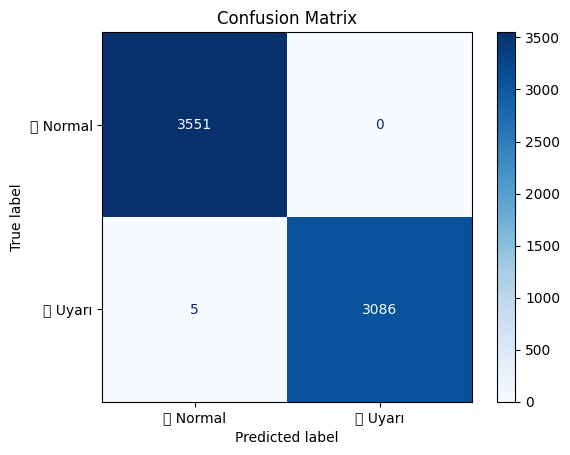

In [93]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion matrix olu≈ütur
cm = confusion_matrix(y_test, y_pred)

# G√∂rselle≈ütir
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['‚úÖ Normal', 'üö® Uyarƒ±'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()


In [94]:
# Veri setinden bir √∂rnek satƒ±r al
test_sample = df[top_features].iloc[[1410]]  # √∂rnek olarak ilk satƒ±r

# Tahmin yap
prediction = model.predict(test_sample)

# Tahmini etiketle g√∂ster
etiket_map = {0: "‚úÖ Normal", 1: "üö® Uyarƒ±"}
print("Tahmin:", etiket_map[prediction[0]])


Tahmin: ‚úÖ Normal
